# **MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿**

## **과제 2️⃣**
### 영화 평점과 흥행 수익 간의 상관관계 분석 

#### 사용자 평점, 비평가 평점, 박스오피스 수익 간의 관계를 분석하고, 평점이 높지만 흥행하지 못한 영화와 평점은 낮지만 흥행한 영화들의 특성을 비교 분석하세요.

#### **1. 상관관계 분석 및 산점도 시각화:**

상관관계 분석
상관관계 분석은 두 변수 사이의 선형 관계 강도를 정량적으로 나타내는 데 사용됨.

평점(vote_average)과 흥행 수익(revenue) 두 변수 간의 관계를 산점도(scatter plot)로 그려보기.
x축을 평점, y축을 수익으로 두면 평점이 높을수록 수익이 높아지는 경향을 시각적으로 확인 가능.

- 데이터 정제: vote_average, vote_average_naver, critic_average, revenue, audience_total 열에 누락된 값이 있는지 확인하고, 필요시 해당 행을 제거하거나 대체해야 합니다.
- 상관관계 계산: 사용자 평점(vote_average 또는 vote_average_naver)과 비평가 평점(critic_average), 그리고 흥행 수익(revenue 또는 audience_total) 간의 피어슨 상관계수를 계산합니다. 이는 두 변수가 얼마나 강한 선형 관계를 가지는지 보여줍니다.
- 시각화: vote_average와 revenue를 각각 x, y축으로 하는 산점도를 그려 시각적으로 상관관계를 확인합니다. 비평가 평점과 흥행 수익에 대해서도 같은 작업을 반복합니다.

In [5]:
import pandas as pd
from IPython.display import display

# 파일 경로 및 청크 사이즈 설정
file_path = './data/processed/kobis_weekly_final.csv'
chunk_size = 10000  # 한 번에 처리할 행의 수 (필요에 따라 조절 가능)

# 상관관계 계산을 위한 리스트 초기화
df_chunks = []

# 1. 데이터를 청크 단위로 불러와 처리
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # 필요한 열만 선택
        analysis_chunk = chunk[['vote_average_naver', 'critic_average', 'revenue', 'audience_total']].copy()
        # 결측값 제거
        analysis_chunk.dropna(inplace=True)
        # 처리된 청크를 리스트에 추가
        df_chunks.append(analysis_chunk)
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()
except Exception as e:
    print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
    exit()

# 모든 청크를 하나로 합치기
if not df_chunks:
    print("오류: 처리할 데이터가 없습니다.")
    exit()

analysis_df = pd.concat(df_chunks, ignore_index=True)

# 2. 상관관계 분석
correlation_matrix = analysis_df.corr()

print("\n---")
print("변수 간 상관관계 행렬:")
# display()를 사용하여 데이터프레임을 더 보기 좋게 출력
display(correlation_matrix)

# 3. 결과 해석
print("\n---")
print("상관관계 분석 결과 해석:")
print(f"1. 사용자 평점(vote_average_naver)과 흥행 수익(revenue)의 상관계수: {correlation_matrix.loc['vote_average_naver', 'revenue']:.4f}")
print(f"2. 비평가 평점(critic_average)과 흥행 수익(revenue)의 상관계수: {correlation_matrix.loc['critic_average', 'revenue']:.4f}")
print(f"3. 사용자 평점(vote_average_naver)과 비평가 평점(critic_average)의 상관계수: {correlation_matrix.loc['vote_average_naver', 'critic_average']:.4f}")


---
변수 간 상관관계 행렬:


,vote_average_naver,critic_average,revenue,audience_total
vote_average_naver,1.000000,0.369636,0.221442,0.233052
critic_average,0.369636,1.000000,0.197014,0.196882
revenue,0.221442,0.197014,1.000000,0.994792
audience_total,0.233052,0.196882,0.994792,1.000000



---
상관관계 분석 결과 해석:
1. 사용자 평점(vote_average_naver)과 흥행 수익(revenue)의 상관계수: 0.2214
2. 비평가 평점(critic_average)과 흥행 수익(revenue)의 상관계수: 0.1970
3. 사용자 평점(vote_average_naver)과 비평가 평점(critic_average)의 상관계수: 0.3696


총 927개 행 중 835개 행을 사용하여 분석을 진행합니다.


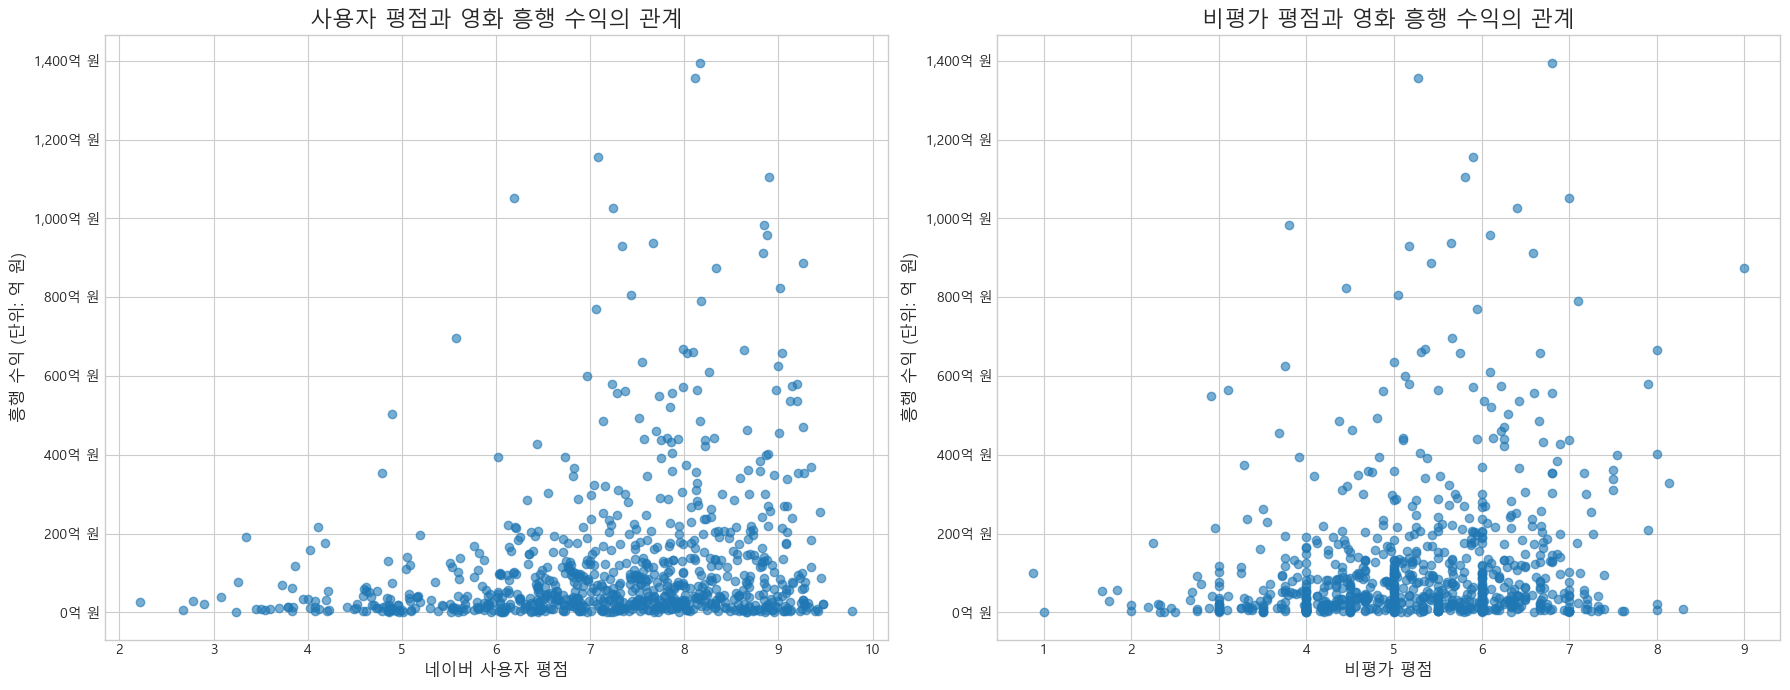

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 경고 메시지를 무시합니다.
warnings.filterwarnings('ignore', category=UserWarning)

# 그래프에서 한글이 깨지지 않도록 폰트 및 스타일을 설정합니다.
# 사용하고 있는 운영체제에 맞춰 한 줄만 활성화하세요.
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


# 파일 경로 및 메모리 효율을 위한 청크 사이즈를 설정합니다.
file_path = './data/processed/kobis_weekly_final.csv'
chunk_size = 10000

# 데이터를 청크(chunk) 단위로 불러옵니다.
df_chunks = []
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        df_chunks.append(chunk)
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# 불러온 모든 청크를 하나의 데이터프레임으로 합칩니다.
df = pd.concat(df_chunks, ignore_index=True)

# 분석에 필요한 열만 선택하고 결측값을 제거합니다.
analysis_df = df[['vote_average_naver', 'critic_average', 'revenue']].copy()
analysis_df.dropna(inplace=True)
print(f"총 {len(df)}개 행 중 {len(analysis_df)}개 행을 사용하여 분석을 진행합니다.")


# 2. plt.subplots를 사용하여 두 그래프를 가로로 나란히 표시합니다.
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# y축 단위를 억 원으로 변경하는 포매터 함수 정의
def y_formatter(y, pos):
    return f'{y/1e8:,.0f}억 원'

# 첫 번째 subplot: 사용자 평점 vs. 흥행 수익
axes[0].scatter(x=analysis_df['vote_average_naver'], y=analysis_df['revenue'], alpha=0.6)
axes[0].set_title('사용자 평점과 영화 흥행 수익의 관계', fontsize=16)
axes[0].set_xlabel('네이버 사용자 평점', fontsize=12)
axes[0].set_ylabel('흥행 수익 (단위: 억 원)', fontsize=12)
axes[0].yaxis.set_major_formatter(FuncFormatter(y_formatter))
axes[0].grid(True)

# 두 번째 subplot: 비평가 평점 vs. 흥행 수익
axes[1].scatter(x=analysis_df['critic_average'], y=analysis_df['revenue'], alpha=0.6)
axes[1].set_title('비평가 평점과 영화 흥행 수익의 관계', fontsize=16)
axes[1].set_xlabel('비평가 평점', fontsize=12)
axes[1].set_ylabel('흥행 수익 (단위: 억 원)', fontsize=12)
axes[1].yaxis.set_major_formatter(FuncFormatter(y_formatter))
axes[1].grid(True)

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


총 927개 행 중 835개 행을 사용하여 분석을 진행합니다.


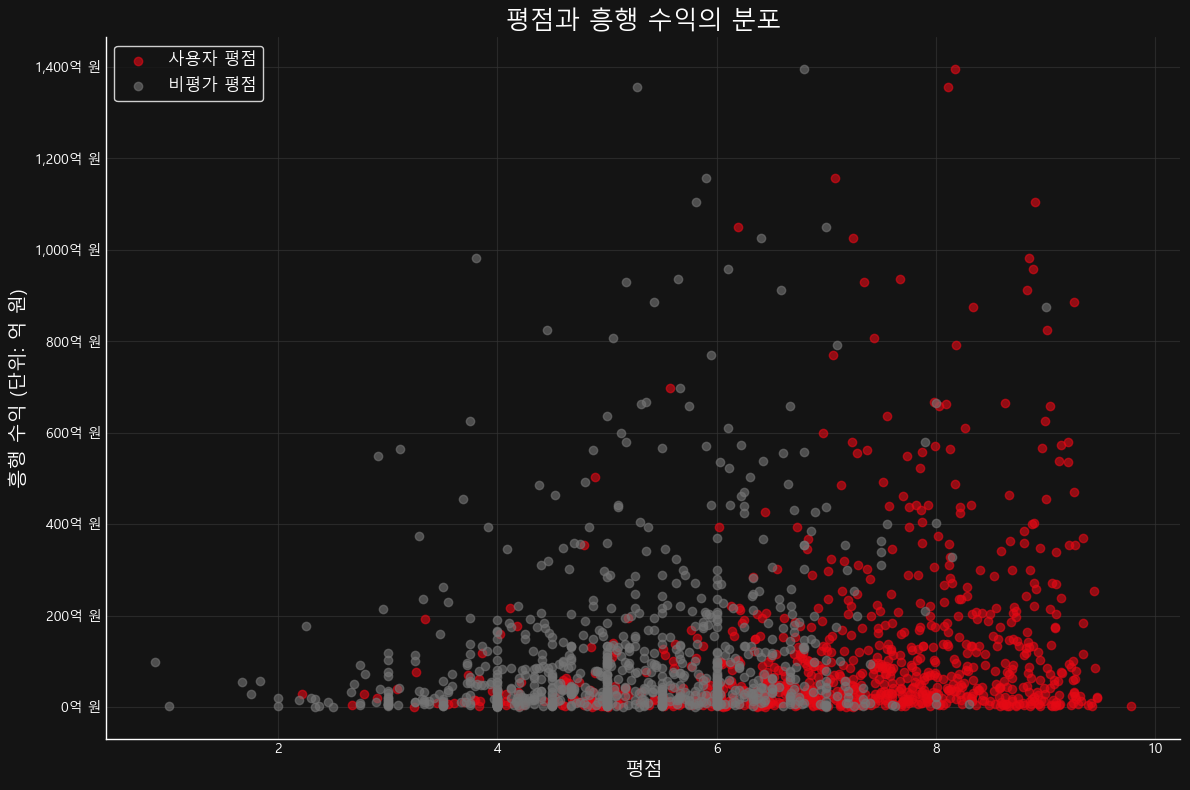

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 경고 메시지를 무시합니다.
warnings.filterwarnings('ignore', category=UserWarning)

# Netflix 스타일 설정
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# Netflix 색상 팔레트 정의
netflix_red = '#e50914'
netflix_dark = '#141414'
netflix_gray = '#757575'
netflix_light_gray = '#b3b3b3'
netflix_dark_gray = '#333333'

# 파일 경로 및 메모리 효율을 위한 청크 사이즈를 설정합니다.
file_path = './data/processed/kobis_weekly_final.csv'
chunk_size = 10000

# 데이터를 청크(chunk) 단위로 불러옵니다.
df_chunks = []
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        df_chunks.append(chunk)
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# 불러온 모든 청크를 하나의 데이터프레임으로 합칩니다.
df = pd.concat(df_chunks, ignore_index=True)

# 분석에 필요한 열만 선택하고 결측값을 제거합니다.
analysis_df = df[['vote_average_naver', 'critic_average', 'revenue']].copy()
analysis_df.dropna(inplace=True)
print(f"총 {len(df)}개 행 중 {len(analysis_df)}개 행을 사용하여 분석을 진행합니다.")


# y축 단위를 억 원으로 변경하는 포매터 함수 정의
def y_formatter(y, pos):
    return f'{y/1e8:,.0f}억 원'


# 하나의 figure에 두 개의 산점도를 겹쳐서 표시합니다.
fig, ax = plt.subplots(figsize=(12, 8), facecolor=netflix_dark)

# 첫 번째 산점도: 사용자 평점 vs. 흥행 수익 (빨간색)
ax.scatter(x=analysis_df['vote_average_naver'], 
           y=analysis_df['revenue'], 
           alpha=0.6,
           c=netflix_red, 
           label='사용자 평점')

# 두 번째 산점도: 비평가 평점 vs. 흥행 수익 (회색)
ax.scatter(x=analysis_df['critic_average'], 
           y=analysis_df['revenue'], 
           alpha=0.6,
           c=netflix_gray, 
           label='비평가 평점')

# 그래프 제목 및 축 라벨 설정
ax.set_title('평점과 흥행 수익의 분포', fontsize=18, color='white')
ax.set_xlabel('평점', fontsize=14, color='white')
ax.set_ylabel('흥행 수익 (단위: 억 원)', fontsize=14, color='white')

# y축 포맷터 적용
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# 그래프 스타일링
ax.grid(True, color=netflix_dark_gray, alpha=0.7)
ax.tick_params(colors='white')
ax.set_facecolor(netflix_dark)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 범례를 박스 형태로 표시
legend = ax.legend(frameon=True, fontsize=12, loc='upper left',
                   facecolor=netflix_dark, edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# 그래프 레이아웃 조정 및 배경색 설정
plt.tight_layout()
fig.patch.set_facecolor(netflix_dark)
plt.show()


---

#### **2. 특이점(Outlier) 찾기 & 그룹별 특성 분석:**

산점도에서 평점은 높지만 수익은 낮은 영화, 또는 평점은 낮지만 수익은 높은 영화 등 일반적인 경향에서 벗어나는 점들을 찾아보기.
이 영화들의 이름을 별도로 리스트업하고 그 영화들의 특징을 살펴보기.
데이터를 정규화하고 높은 평점, 낮은 수익 그룹과 낮은 평점, 높은 수익 그룹 정의하여 각 그룹에 속한 영화들의 공통적인 특성 분석.

- 특이점(Outlier) 찾기
    -  MinMaxScaler를 사용해 정규화 시키기
        - 📈 MinMaxScaler (최소-최대 정규화):
        MinMaxScaler는 각 데이터 포인트를 0과 1 사이의 값으로 변환하는 일반적인 정규화 기법. 이 방법을 사용하면 데이터의 원래 분포는 유지하면서도 서로 다른 범위를 가진 변수들(예: 평점 0~10 vs. 수익 억 단위)을 동일한 척도로 비교 가능.

- 그룹별 특성 분석
    - 장르: 어떤 장르의 영화가 이 그룹에 많이 속해 있나요?
    - 제작 예산: 저예산 영화인가요, 아니면 고예산 영화인가요?

2. 평점과 흥행 특성 비교
평점과 흥행을 기준으로 영화를 4개 그룹으로 나누어 특성을 비교할 수 있습니다.

기준 설정: 흥행과 평점을 나누는 기준을 정해야 합니다.
흥행 기준: revenue나 audience_total의 중간값(median)을 기준으로 삼아 고흥행/저흥행 영화를 분류할 수 있습니다.
평점 기준: vote_average의 중간값 또는 8점과 같은 특정 점수를 기준으로 고평점/저평점 영화를 분류할 수 있습니다.
영화 분류: 정한 기준을 바탕으로 영화를 네 그룹으로 나눕니다.

고평점 & 고흥행: vote_average > 8.0, revenue > 중간값
고평점 & 저흥행: vote_average > 8.0, revenue <= 중간값
저평점 & 고흥행: vote_average <= 8.0, revenue > 중간값
저평점 & 저흥행: vote_average <= 8.0, revenue <= 중간값

그룹별 특성 비교: 각 그룹에 속한 영화들의 공통적인 특성을 분석합니다.
장르(genres): 특정 장르가 흥행에 유리한지 확인합니다.
감독(director_name_ko): 유명 감독의 영화가 평점이나 흥행에 영향을 미치는지 분석합니다.
개봉 시기(release_month): 흥행에 유리한 특정 월이 있는지 파악합니다.
캐스팅(cast_names_ko): 스타 배우들의 캐스팅이 흥행에 미치는 영향을 확인합니다.

#### **시각화**

**1. 영화 평점 및 수익 분포 (히스토그램)**
- 영화 평점 분포 (왼쪽): 이 그래프는 대부분의 영화가 6점에서 8점 사이의 비교적 높은 평점에 집중되어 있음을 보여줌. 평점은 7점 부근에 가장 많은 영화가 몰려 있어, 종 모양의 정규분포와 유사한 경향을 보임. 이는 대다수 영화가 보통 이상의 평점을 기록하지만 극단적으로 낮거나 높은 평점의 영화는 드물다는 것을 의미.

- 영화 수익 분포 (오른쪽): 이 그래프는 수익이 0에 가까운 낮은 값에 집중되어 있고 수익이 높을수록 영화 수가 급격히 줄어드는 오른쪽으로 치우친(right-skewed) 분포를 보임. 이는 영화 시장에서 소수의 블록버스터 영화가 전체 수익의 대부분을 차지하고 대다수 영화는 상대적으로 낮은 수익을 기록한다는 사실을 나타냄.

- 왜도(Skewness)는 데이터가 한쪽으로 치우쳐 있는 정도를 나타내는 통계적 척도. KDE 곡선의 모양을 보면 데이터가 어느 방향으로 길게 꼬리를 늘어뜨리고 있는지 한눈에 알 수 있음.
    - 영화 평점 분포(왼쪽 그래프): KDE 곡선이 정중앙을 기준으로 비교적 대칭적인 종 모양을 띠고 있음. 이는 평점 데이터가 한쪽으로 크게 치우치지 않고 균형 잡힌 분포를 보인다는 것을 의미.
    - 영화 수익 분포(오른쪽 그래프): KDE 곡선이 왼쪽(낮은 수익)에 대부분의 영화 수가 몰려 있고 오른쪽(높은 수익)으로 길고 완만한 꼬리를 늘어뜨리고 있음. 이것은 '오른쪽으로 치우친(Positive Skewness)' 분포를 명확하게 보여줌. 즉, 극소수의 영화가 압도적인 높은 수익을 기록하고 대부분의 영화는 낮은 수익을 냈다는 것을 시각적으로 확인할.


**2. 영화 평점과 수익 관계 (산점도)**

이 산점도는 영화의 **평점(Y축)**과 **수익(X축)** 간의 관계를 보여줌.

- 회색 점: 전체 영화 데이터를 나타내며 대부분의 영화가 낮은 수익과 다양한 평점 범위에 넓게 분포하고 있음을 보여줌.

- 파란색 점: '높은 평점, 낮은 수익' 그룹을 나타냄. 이 영화들은 평점은 높지만 수익은 매우 낮은 좌측 상단에 위치하며 작품성은 뛰어나지만 흥행에는 실패한 영화들.

- 빨간색 점: '낮은 평점, 높은 수익' 그룹을 나타냄. 이 영화들은 평점은 낮지만 수익은 높은 우측 하단에 위치하며 평가는 좋지 않았지만 상업적으로 성공한 영화들.

**3. 특이점 그룹별 예산 분포 (상자 그림)**

이 상자 그림은 로그 스케일로 변환된 예산을 사용하여 두 특이점 그룹의 예산 분포를 비교함.

- 높은 평점, 낮은 수익 그룹 (왼쪽): 이 그룹의 예산 중앙값(상자 안의 가로선)은 낮은 범위에 위치함. 이는 영화 자체의 완성도(평점)와 무관하게 상대적으로 적은 제작비가 흥행 부진의 한 원인이 될 수 있음을 시사.

- 낮은 평점, 높은 수익 그룹 (오른쪽): 이 그룹의 예산 중앙값은 왼쪽 그룹보다 훨씬 높은 범위에 위치함. 이는 작품성에 대한 낮은 평가에도 불구하고 막대한 예산이 마케팅, 시각 효과 등 흥행 요소에 사용되어 상업적 성공을 이끌었을 가능성이 높음을 보여줌.